# Data Visualization in Python

There are many data visualization libraries to make charts and graphs using data in Python.  The oldest and probably the most powerful of these is Matplotlib.  It has many options to control the creation of charts, but it is also one of the most complex libraries to use to make charts.  We will spend much of this session on learning how to use Matplotlib, and then switch to exploring tutorials with a new Python library, Altair.

To do the Altair tutorials, you'll need to install the library first.
At the command prompt, install it with this command:
conda install altair --channel conda-forge

We will come back to this later in the class session.

Objectives for today's session:

* Learn how to use Matplotlib to make basic charts:
    * Line charts
    * Histograms
    * Scatterplots
* Learn how to add titles, and labels for X and Y axes
* Learn how to control the styling of the charts
* Learn how to create a composite figure with subplots
* Learn how to export figures to png to use elsewhere

* Introduce Altair charting library

In addition, we will explore Census data and Craigslist rentals to visualize them.


## Visualizing Census Data

Here we load 2010 Census Block data to set up some initial analysis and data visualization. Below are the tables pulled from Summary File 1 (SF1) for Census Blocks in the San Francisco Bay Area.

In [28]:
import pandas as pd

sf1store = pd.HDFStore('data/bay_sf1_small.h5')
sf1 = sf1store['sf1_extract']
print(sf1[:5])
print(sf1.shape)

   logrecno        blockfips state county   tract  blkgrp block  arealand  \
0        25  060014271001000    06    001  427100       1  1000         0   
1        26  060014271001001    06    001  427100       1  1001     79696   
2        27  060014271001002    06    001  427100       1  1002       739   
3        28  060014271001003    06    001  427100       1  1003     19546   
4        29  060014271001004    06    001  427100       1  1004     14364   

   P0010001  P0020001    ...     H0040003  H0040004  H0050001  H0050002  \
0         0         0    ...            0         0         0         0   
1       113       113    ...            1         4         0         0   
2         0         0    ...            0         0         0         0   
3        29        29    ...            0         7         3         0   
4        26        26    ...            0         6         0         0   

   H0050003  H0050004  H0050005  H0050006  H0050007  H0050008  
0         0         0 

Let's calculate some basic information about each census block in the Bay Area.

In [29]:
sf1['pct_rent'] = sf1['H0040004'] / sf1['H0040001'] * 100
sf1['pct_black'] = sf1['P0030003'] / sf1['P0030001'] * 100
sf1['pct_asian'] = sf1['P0030005'] / sf1['P0030001'] * 100
sf1['pct_white'] = sf1['P0030002'] / sf1['P0030001'] * 100
sf1['pct_hisp'] = sf1['P0040003'] / sf1['P0040001'] * 100
sf1['pct_vacant'] = sf1['H0050001'] / sf1['H00010001'] * 100
sf1['pop_sqmi'] = (sf1['P0010001'] / (sf1['arealand'] / 2589988))
sf1 = sf1[sf1['P0030001']>0]
print(sf1.head())
print(sf1.shape)

   logrecno        blockfips state county   tract  blkgrp block  arealand  \
1        26  060014271001001    06    001  427100       1  1001     79696   
3        28  060014271001003    06    001  427100       1  1003     19546   
4        29  060014271001004    06    001  427100       1  1004     14364   
6        31  060014271001006    06    001  427100       1  1006      1281   
7        32  060014271001007    06    001  427100       1  1007     19020   

   P0010001  P0020001     ...       H0050006  H0050007  H0050008    pct_rent  \
1       113       113     ...              0         0         0   80.000000   
3        29        29     ...              0         0         2   70.000000   
4        26        26     ...              0         0         0   75.000000   
6         2         2     ...              0         0         0  100.000000   
7        30        30     ...              0         0         0   33.333333   

   pct_black  pct_asian  pct_white    pct_hisp  pct_vaca

In [30]:
sf1.describe()

,logrecno,blkgrp,arealand,P0010001,P0020001,P0020002,P0020003,P0020004,P0020005,P0020006,...,H0050006,H0050007,H0050008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,pop_sqmi
count,68797.000000,68797.000000,6.879700e+04,68797.000000,68797.000000,68797.0,68797.0,68797.0,68797.0,68797.000000,...,68797.000000,68797.000000,68797.000000,68200.000000,68797.000000,68797.000000,68797.000000,68797.000000,68209.000000,6.879700e+04
mean,404141.990552,2.138146,1.842772e+05,103.939692,103.939692,0.0,0.0,0.0,0.0,103.939692,...,0.416617,0.002675,0.612309,33.686597,6.113801,18.683807,59.628902,20.663419,5.896477,1.115862e+04
std,299752.023748,1.136372,1.707375e+06,142.419653,142.419653,0.0,0.0,0.0,0.0,142.419653,...,2.879630,0.096414,2.022353,30.819961,13.202340,22.181204,28.189146,22.434874,9.319408,2.073782e+04
min,26.000000,1.000000,7.600000e+01,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.959760e-01
25%,46514.000000,1.000000,1.214600e+04,31.000000,31.000000,0.0,0.0,0.0,0.0,31.000000,...,0.000000,0.000000,0.000000,10.000000,0.000000,1.030928,37.606838,4.072398,0.000000,4.061415e+03
50%,592917.000000,2.000000,2.031000e+04,66.000000,66.000000,0.0,0.0,0.0,0.0,66.000000,...,0.000000,0.000000,0.000000,22.950820,0.000000,10.465116,63.076923,12.871287,3.263403,8.157075e+03
75%,658809.000000,3.000000,4.325300e+04,125.000000,125.000000,0.0,0.0,0.0,0.0,125.000000,...,0.000000,0.000000,1.000000,50.943396,5.714286,27.659574,83.333333,29.870130,7.692308,1.323492e+04
max,721989.000000,7.000000,2.774832e+08,5115.000000,5115.000000,0.0,0.0,0.0,0.0,5115.000000,...,246.000000,17.000000,205.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.172735e+06


In [31]:
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline
import pandas as pd

## Basic Graphs With Matplotlib

Matplotlib is the oldest and most widely used of the charting libraries for Python, and integrates seamlessly into IPython notebooks.  Making simple charts of all kinds is very straightforward.  Matplotlib also has a tremendous number of options that enable a user to carefully control the appearance of charts.  This power is one of Matplotlib's best and worst features, at the same time.  Using those options is complicated.

Here we will stick to basic plots that Matplotlib makes easy, and then switch to a newer charting library that handles both simple and more complex charts well.

The first example is a chart showing that you can use Numpy methods like sort to create a revealing line graph showing in this case how few census blocks have a relatively large numbers of people in them.

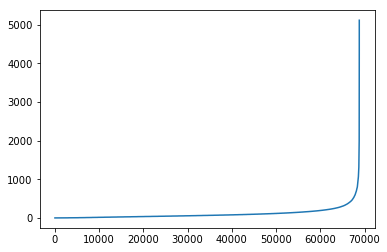

In [32]:
plt.plot(np.sort(sf1['P0010001']))
plt.show()

Next we look at a cumulative sum of population across blocks.  The order they are added is based on the order they have in the DataFrame, so this is somewhat arbitrary.

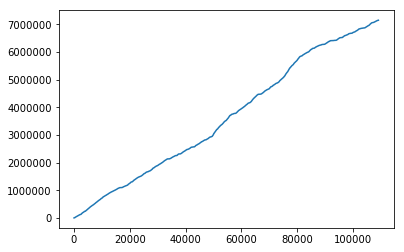

In [33]:
plt.plot(np.cumsum(sf1['P0010001']))
plt.show()

Combining the sort and cumulative sum methods makes this look more interesting.

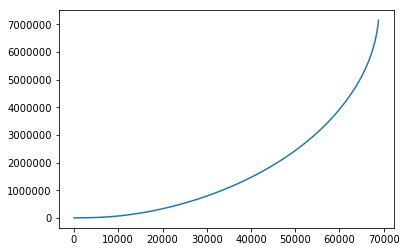

In [8]:
plt.plot(np.cumsum(np.sort(sf1['P0010001'])))
plt.show()

As we have seen before, simple histograms are also easy to produce.  Here is the same population data displayed as a histogram. You can control things like the number of bins, or the color, easily.

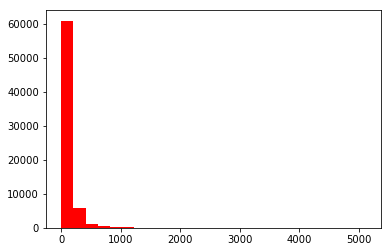

In [34]:
plt.hist(sf1['P0010001'], bins=25, color='red')
plt.show()

The distribution of population seems to be very skewed, with most blocks having relatively small population counts.  To zoom in to those and get a better sense of the distribution we might slice the blocks to isolate those below the long tail of the distribution.  Let's plot the distribution again after truncating the top one percent.  Increasing the number of bins provides greater detail as well.  We can see that 99% of the blocks have less than 700 people, and that there are still a significant number of blocks with only a few people in them.

687.0399999999936


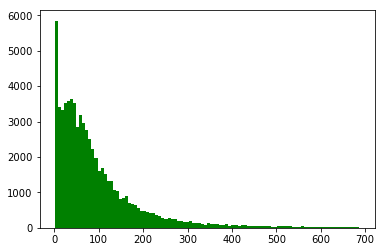

In [35]:
print(sf1['P0010001'].quantile(.99))
small_pop = sf1[sf1['P0010001'] < sf1['P0010001'].quantile(.99)]
plt.hist(small_pop['P0010001'], bins=100, color='green')
plt.show()

### Exploring Racial and Ethnic Concentration in the Bay Area

Let's use the 2010 population by race and ethnicity to explore the spatial concentration of people of different races and ethnicities in the Bay Area.  First, compute a regional percentage to use as a frame of reference for rhe block-level profiles. 

In [36]:
print('Regional Pct White: '+"{0:.1f}%".format(sf1['P0030002'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Black: '+"{0:.1f}%".format(sf1['P0030003'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Asian: '+"{0:.1f}%".format(sf1['P0030005'].sum()/sf1['P0030001'].sum()*100))
print('Regional Pct Hispanic: '+"{0:.1f}%".format(sf1['P0040003'].sum()/sf1['P0040001'].sum()*100))
print('Note that these add up to more than 100% since Hispanic is not broken out by race in this calculation')

Regional Pct White: 52.5%
Regional Pct Black: 6.7%
Regional Pct Asian: 23.3%
Regional Pct Hispanic: 23.5%
Note that these add up to more than 100% since Hispanic is not broken out by race in this calculation


Now create a statistical profile and generate histograms of the distribution of each of these population groups.  What kinds of descriptive conclusions could you draw about how they differ from each other?

count    68797.000000
mean        18.683807
std         22.181204
min          0.000000
25%          1.030928
50%         10.465116
75%         27.659574
max        100.000000
Name: pct_asian, dtype: float64


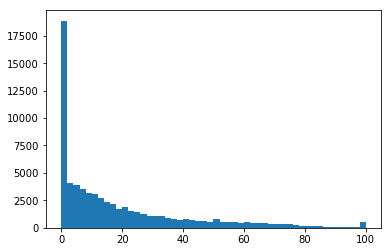

In [37]:
print(sf1['pct_asian'].describe())
plt.hist(sf1['pct_asian'], bins=50)
plt.show()

count    68797.000000
mean        20.663419
std         22.434874
min          0.000000
25%          4.072398
50%         12.871287
75%         29.870130
max        100.000000
Name: pct_hisp, dtype: float64


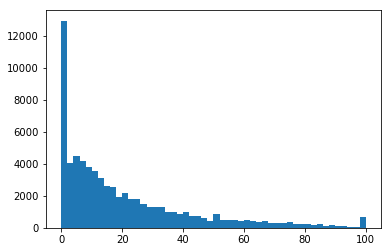

In [38]:
print(sf1['pct_hisp'].describe())
plt.hist(sf1['pct_hisp'], bins=50)
plt.show()

count    68797.000000
mean         6.113801
std         13.202340
min          0.000000
25%          0.000000
50%          0.000000
75%          5.714286
max        100.000000
Name: pct_black, dtype: float64


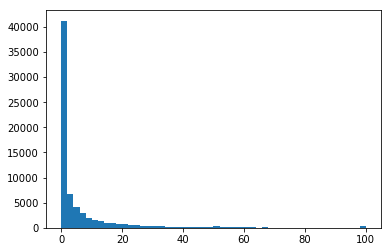

In [39]:
print(sf1['pct_black'].describe())
plt.hist(sf1['pct_black'], bins=50)
plt.show()

count    68797.000000
mean        59.628902
std         28.189146
min          0.000000
25%         37.606838
50%         63.076923
75%         83.333333
max        100.000000
Name: pct_white, dtype: float64


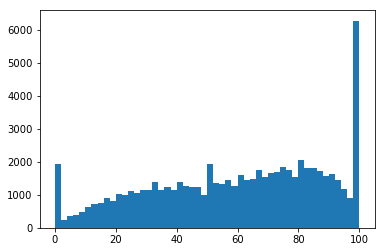

In [40]:
print(sf1['pct_white'].describe())
plt.hist(sf1['pct_white'], bins=50)
plt.show()

To make figures easier to compare side-by-side, Matplotlib enables creating a composite figure using subplots.

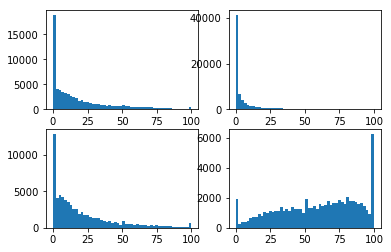

In [41]:
plt.figure(1)
plt.subplot(221)
plt.hist(sf1['pct_asian'], bins=50)

plt.subplot(222)
plt.hist(sf1['pct_black'], bins=50)

plt.subplot(223)
plt.hist(sf1['pct_hisp'], bins=50)

plt.subplot(224)
plt.hist(sf1['pct_white'], bins=50)

plt.show()

The figures by default are a bit too small, and now it would really help to add some titles and legends to make this easier to read.

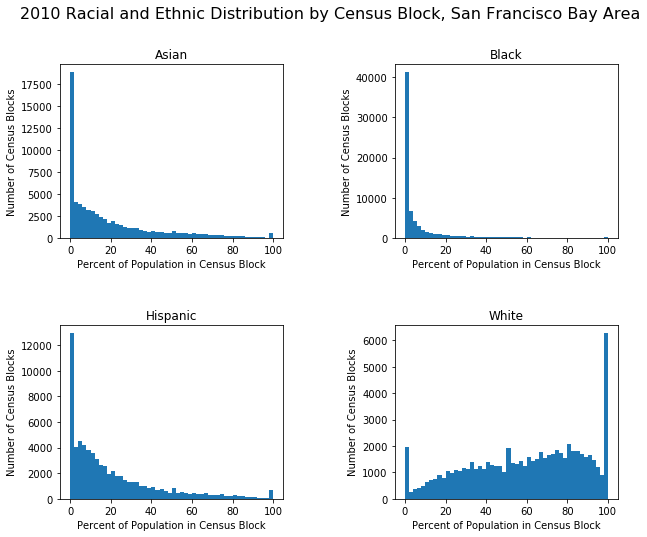

In [42]:
plt.figure(1, figsize=(10,8), )
plt.suptitle("2010 Racial and Ethnic Distribution by Census Block, San Francisco Bay Area", fontsize=16)

ax = plt.subplot(221)
ax.set_title("Asian")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.hist(sf1['pct_asian'], bins=50)

ax = plt.subplot(222)
ax.set_title("Black")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.hist(sf1['pct_black'], bins=50)

ax = plt.subplot(223)
ax.set_title("Hispanic")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.hist(sf1['pct_hisp'], bins=50)

ax = plt.subplot(224)
ax.set_title("White")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.hist(sf1['pct_white'], bins=50)

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

But notice that the y axis scales are different for each subplot?  That makes direct comparisons potentially distorted by the difference in the scales.  Below we add consistent scales for the y axis on each subplot.

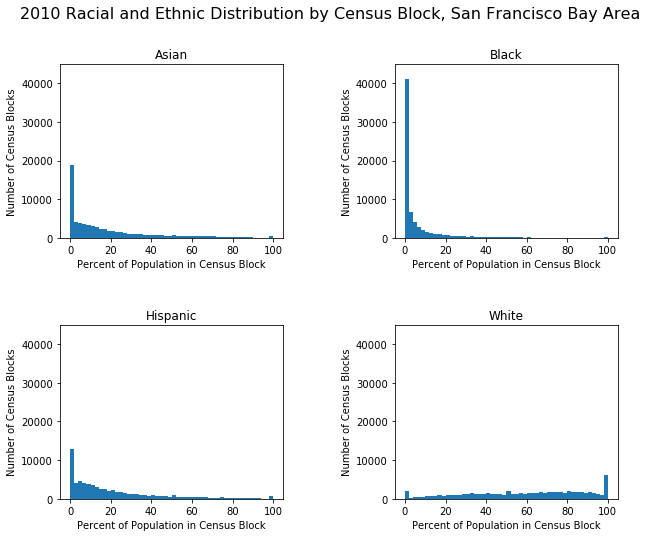

In [43]:
plt.figure(1, figsize=(10,8), )
plt.suptitle("2010 Racial and Ethnic Distribution by Census Block, San Francisco Bay Area", fontsize=16)

ax = plt.subplot(221)
ax.set_title("Asian")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_asian'], bins=50)

ax = plt.subplot(222)
ax.set_title("Black")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_black'], bins=50)

ax = plt.subplot(223)
ax.set_title("Hispanic")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_hisp'], bins=50)

ax = plt.subplot(224)
ax.set_title("White")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_white'], bins=50)

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

Finally, a bit more tweaking of the plots, changing the color and edgecolor of the bars, and decreasing the alpha (opacity) of the bars.  And here we save the figure to a png file at a specified dpi.

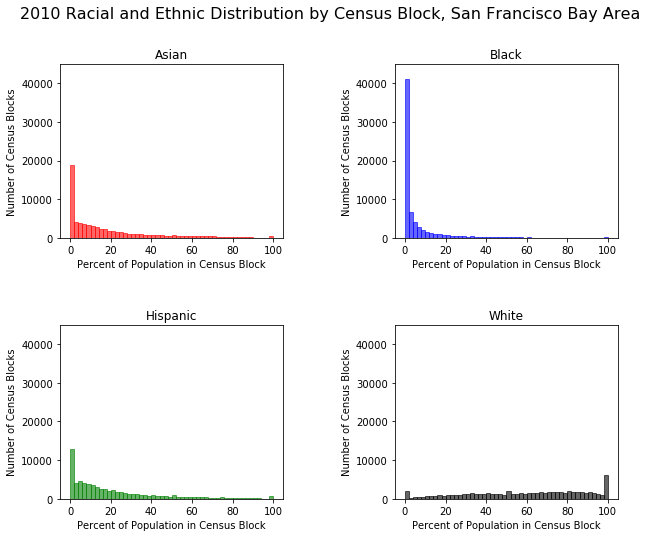

In [24]:
plt.figure(1, figsize=(10,8), )
plt.suptitle("2010 Racial and Ethnic Distribution by Census Block, San Francisco Bay Area", fontsize=16)

ax = plt.subplot(221)
ax.set_title("Asian")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_asian'], bins=50, alpha=.6, color='r', edgecolor='r')

ax = plt.subplot(222)
ax.set_title("Black")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_black'], bins=50, alpha=.6, color='b', edgecolor='b')

ax = plt.subplot(223)
ax.set_title("Hispanic")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_hisp'], bins=50, alpha=.6, color='g', edgecolor='g')

ax = plt.subplot(224)
ax.set_title("White")
ax.set_xlabel('Percent of Population in Census Block')
ax.set_ylabel('Number of Census Blocks')
ax.set_ylim(0,45000)
ax.hist(sf1['pct_white'], bins=50, alpha=.6, color='k', edgecolor='k')

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.savefig("2010_racial_distributuon_bay_area.png",dpi=150)
plt.show()


## Visualizing Craigslist Data

Next we read Craigslist rental listings for the San Francisco Bay Area - over 70,000 listings scraped during 2014,  cleaned, and reverse geocoded to attach a Census Block ID that we can use to merge with census data.

In [44]:
rentals = pd.read_csv('data/sfbay_geocoded.csv', dtype={'fips_block': str})
rentals = rentals.iloc[:,2:]
print(rentals.head())
print(rentals.shape)
print(rentals['rent'].describe())
print(rentals['sqft'].describe())

          pid        date region              neighborhood    rent  bedrooms  \
0  4465937146  2014-05-11  sfbay  twin peaks / diamond hts  4500.0       2.0   
1  4446270486  2014-05-11  sfbay                 sunnyvale  2650.0       2.0   
2  4465913377  2014-05-11  sfbay                 glen park  3100.0       2.0   
3  4465933497  2014-05-11  sfbay              redwood city  1850.0       1.0   
4  4465926659  2014-05-11  sfbay              walnut creek  1325.0       1.0   

     sqft  rent_sqft  rent_sqft_cat   longitude   latitude         county  \
0  1200.0   3.750000              5 -122.438300  37.745000  San Francisco   
1  1040.0   2.548077              5 -122.008131  37.353699    Santa Clara   
2  1000.0   3.100000              5 -122.439743  37.731584  San Francisco   
3   792.0   2.335859              5 -122.234294  37.491715      San Mateo   
4   642.0   2.063863              5 -122.087751  37.923448   Contra Costa   

        fips_block state  
0  060750216002015    CA  
1 

Start by creating a default histogram of rents.

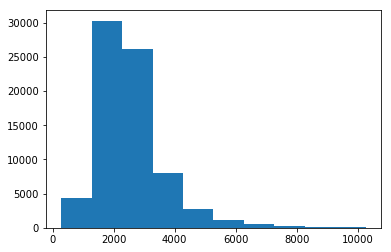

In [45]:
plt.hist(rentals['rent'])
plt.show()

Now make it look nicer, adding titles, axis labels, and setting the color and alpha.

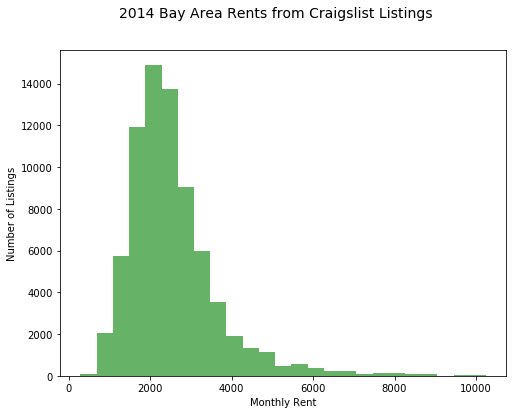

In [46]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('2014 Bay Area Rents from Craigslist Listings', fontsize=14)
plt.xlabel('Monthly Rent')
plt.ylabel('Number of Listings')
ax = plt.hist(rentals['rent'], bins=25, alpha=.6, color='g')
plt.show()

Now lets look at generating a scatter plot between two variables -- sqft and rent.

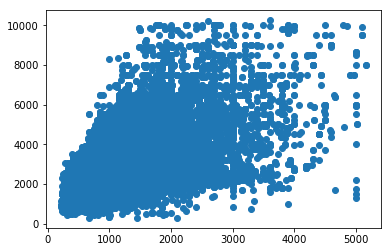

In [47]:
plt.scatter(rentals['sqft'], rentals['rent'])

And a somewhat nicer version:

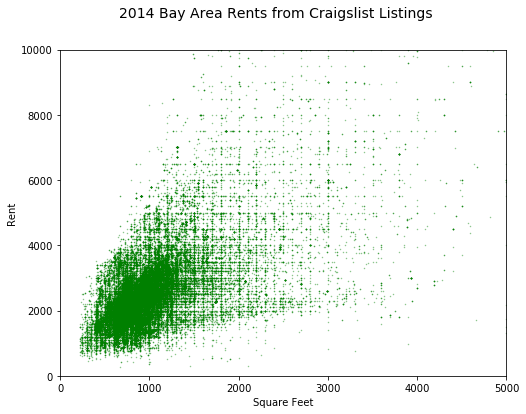

In [48]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('2014 Bay Area Rents from Craigslist Listings', fontsize=14)
plt.xlabel('Square Feet')
plt.ylabel('Rent')
plt.xlim(0,5000)
plt.ylim(0,10000)
ax = plt.scatter(rentals['sqft'], rentals['rent'], color='g', alpha=.5, edgecolor='g', s=.2)
plt.show()

And here we look at a scatter plot of rents against number of bedrooms.

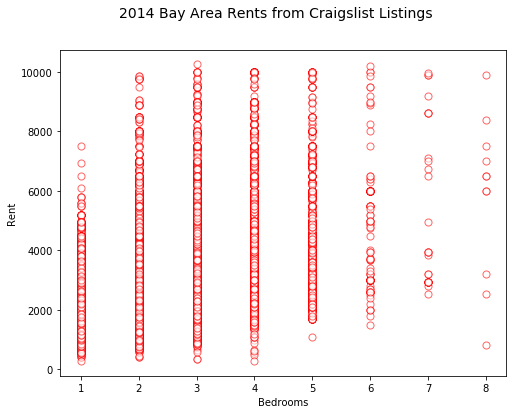

In [49]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('2014 Bay Area Rents from Craigslist Listings', fontsize=14)
plt.xlabel('Bedrooms')
plt.ylabel('Rent')
ax = plt.scatter(rentals['bedrooms'], rentals['rent'], color='w', edgecolor='r', alpha=.6, s=50)
plt.show()

## Improving on Matplotlib: Seaborn

From the introductory notes on the Seaborn site at https://seaborn.pydata.org/introduction.html#introduction:

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Some of the features that seaborn offers are

* Several built-in themes for styling matplotlib graphics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations

Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

In [77]:
import seaborn as sns
#sns.set(color_codes=True)
sns.set()

The plot below uses the rental data we plotted using a standard hist method of Pandas above, but uses the Seaborn *distplot* method instead.  This plots a histogram, normalized so that the bars area of the bars sum to 1, and superimposses a KDE plot.  KDE stands for Kernel Density Estimate, which provides a smoothed function that has the same property as the normalized histogram: the area under the curve sums to 1. Think of it as though it is a normalized histogram with a really large number of bars, and smoothed.  

This gives a good view of the distribution of the data where the y axis is a proportion of the data that is within each x-axis interval.

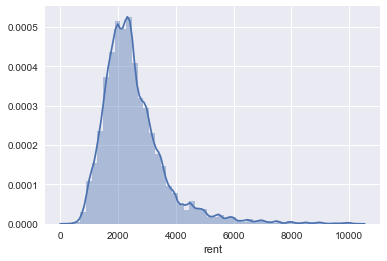

In [78]:
sns.distplot(rentals['rent']);

If you want just the histogram component of this like before, but with nicer aesthetics like the grid, just suppress the kde plot.  You can also specify the numbe of bins, etc.

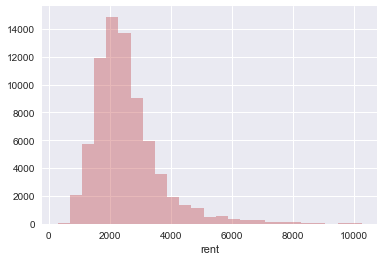

In [79]:
sns.distplot(rentals['rent'], bins=25, color='r', kde=False);

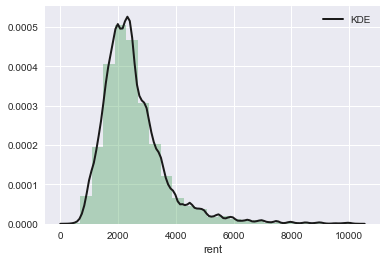

In [80]:
sns.distplot(rentals['rent'], kde_kws={"color": "k", "lw": 2, "label": "KDE"}, bins=25, color='g')

Are our rents normally distributed?  We can superimpose a plot of a normal distribution fit to our data using a norm method of the Scipy stats library to visually inspect this.

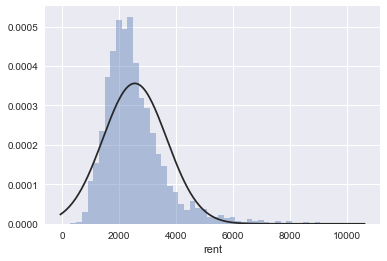

In [84]:
from scipy.stats import norm
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)

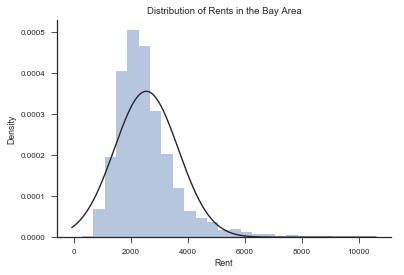

In [105]:
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], bins=25, fit=norm, kde=False)
ax.set_title("Distribution of Rents in the Bay Area")
ax.set_ylabel('Density')
ax.set_xlabel('Rent')
sns.despine()

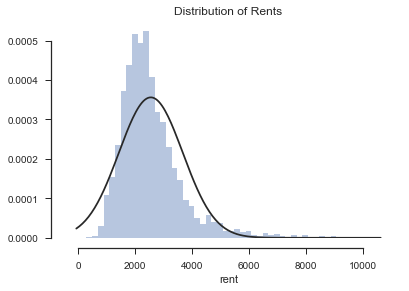

In [94]:
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

### Context presets

Seaborn comes with four preset 'contexts' for graphs, which alter the graphical elements to be optimized for incuding in a *paper*, or using in a *talk*, or in a *notebook*, or printing on a *poster*.

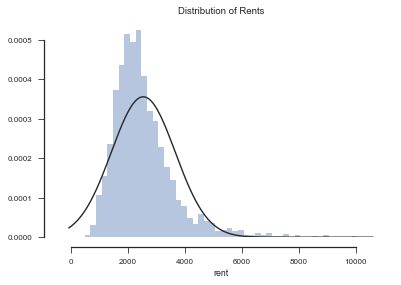

In [102]:
sns.set_context("paper")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

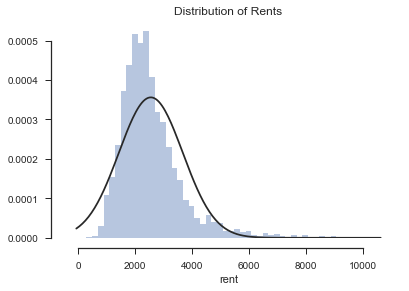

In [99]:
sns.set_context("notebook")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

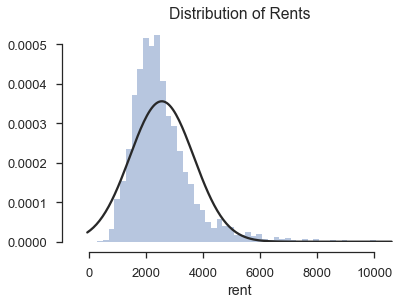

In [100]:
sns.set_context("talk")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);

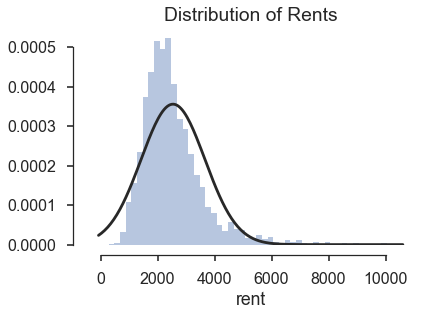

In [101]:
sns.set_context("poster")
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(rentals['rent'], fit=norm, kde=False)
ax.set_title("Distribution of Rents")
sns.despine(offset=10, trim=True);